In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF


from sklearn.metrics import confusion_matrix, accuracy_score, plot_roc_curve

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv("heart.csv")
print(data.head(5))
print(data.info())
print(data.isna().sum())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-

**No nan values, let's make some visualizations** 






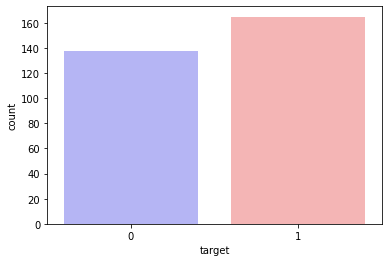

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [ ]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

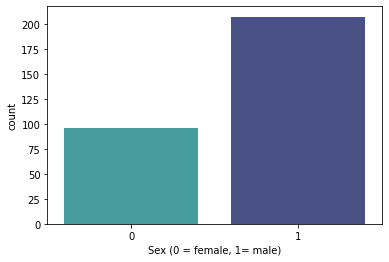

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [ ]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))

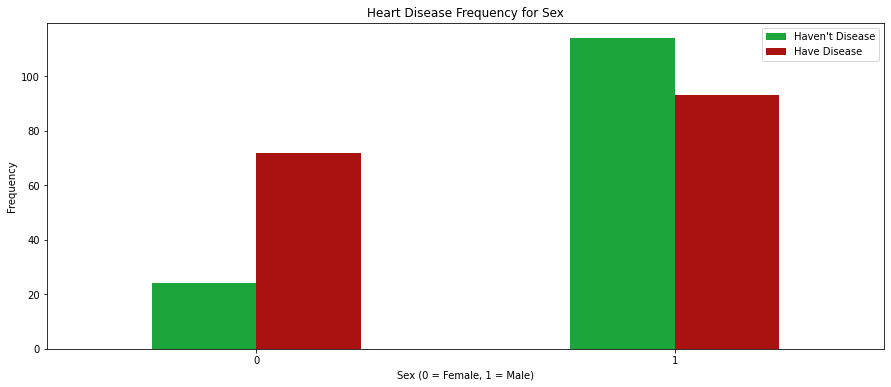

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

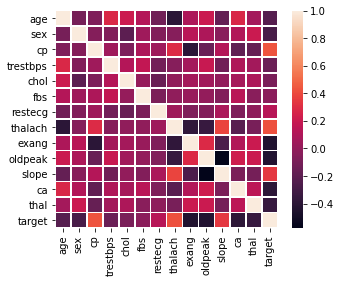

In [ ]:
# # calculate the correlation matrix
corr = data.corr()

# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

**Building ML classification model** with these 3 methods: Logistic regression, decision tree and random forest

In [ ]:
#split data into inputs an target
X = data.iloc[:,0:13].values
y = data.iloc[:,13].values
#Normalize data
X_std = StandardScaler().fit_transform(X)
dataNorm = pd.DataFrame(X_std, index=data.index, columns=data.columns[0:13])
dataNorm['target'] = data['target']
print(dataNorm.head(5))

X = dataNorm.iloc[:,0:13].values
y = dataNorm.iloc[:,13].values

        age       sex        cp  trestbps  ...     slope        ca      thal  target
0  0.952197  0.681005  1.973123  0.763956  ... -2.274579 -0.714429 -2.148873       1
1 -1.915313  0.681005  1.002577 -0.092738  ... -2.274579 -0.714429 -0.512922       1
2 -1.474158 -1.468418  0.032031 -0.092738  ...  0.976352 -0.714429 -0.512922       1
3  0.180175  0.681005  0.032031 -0.663867  ...  0.976352 -0.714429 -0.512922       1
4  0.290464 -1.468418 -0.938515 -0.663867  ...  0.976352 -0.714429 -0.512922       1

[5 rows x 14 columns]


In [ ]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((212, 13), (212,), (91, 13), (91,))

In [ ]:
# Plotting the confusion matrix 

def conf_matrix(algo_name, y_pred_prob, y_test):
    forest_cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name))


1. **Logistic regression**



Logistic Regression :
Mean Squared Error: 0.18681318681318682
R score: 0.2519342359767893
Mean Absolute Error: 0.18681318681318682
Accuracy =  0.8131868131868132


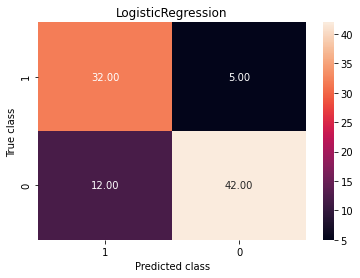

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression :")
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)
print("Accuracy = ", accuracy)
conf_matrix("LogisticRegression",y_test,y_pred)


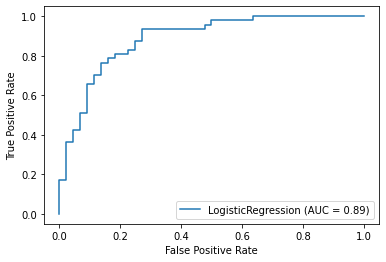

In [ ]:
# Plotting the ROC Curve
plot_roc_curve(classifier, X_test, y_test)  
plt.show()  

2. **Decison tree**

Decision Tree Classifier :
Mean Squared Error: 0.2087912087912088
R score: 0.16392649903288214
Mean Absolute Error: 0.2087912087912088
Accuracy =  0.7912087912087912


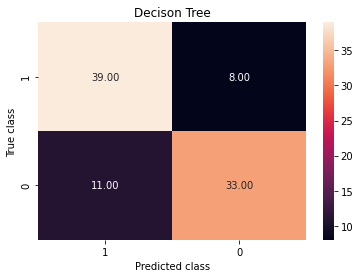

In [ ]:
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Decision Tree Classifier :")
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)
print("Accuracy = ", accuracy)

conf_matrix("Decison Tree",y_test,y_pred)

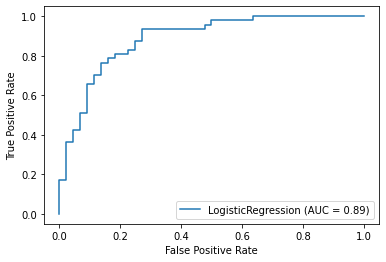

In [ ]:
# Plotting the ROC Curve
plot_roc_curve(classifier, X_test, y_test)  
plt.show()  

3. **Random forest**

Random Forest Classifier :
Mean Squared Error: 0.1978021978021978
R score: 0.20793036750483573
Mean Absolute Error: 0.1978021978021978
Accuracy =  0.8021978021978022


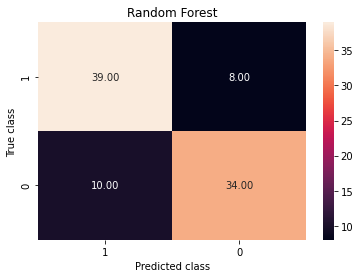

In [ ]:
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Random Forest Classifier :")
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)
print("Accuracy = ", accuracy)

conf_matrix("Random Forest",y_test,y_pred)



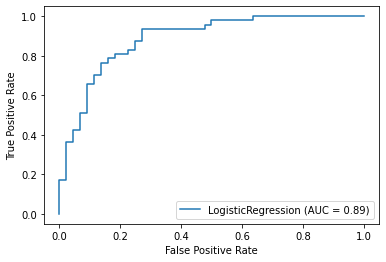

In [ ]:
# Plotting the ROC Curve
plot_roc_curve(classifier, X_test, y_test)  
plt.show()  